El conjunto iris contiene las caracteristicas de 3 variades de plantas iris, setosa, virginica y versicolor.

# Carga DataSet y librerias

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

Para este ejercicio no analizaré si el conjunto de datos es correcto, es decir, si el conjunto necesita un trabajo de preprocesado previo revisando si existen columnas duplicadas, outlayers o datos mal recogidos.

In [3]:
dataNombre = pd.DataFrame(data= np.c_[iris['data'],pd.Series(iris['target']).map({0:'setosa',1:'versicolor',2:'virginica'})],
                    columns= ['sepal_length', 'sepal_width','petal_length','petal_width','Tarjet'])

In [4]:
dataNombre

,sepal_length,sepal_width,petal_length,petal_width,Tarjet
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,virginica
146,6.3,2.5,5,1.9,virginica
147,6.5,3,5.2,2,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= ['sepal_length', 'sepal_width','petal_length','petal_width','Tarjet'])

Son 4 características por suceso, por elemento de la muestra.

# Estadísticas del conjunto 

Primero separare la muestra en los 3 conjuntos, de manera que pueda analizarlos por separado. Esto me permitiría observar que la muestra está balanceada. Como el objetivo es clasificar, es decir, saber que planta es en función de sus características, una muestra desbalanceada podría dar como resultado un clasificador con preferencia por alguno de los objetivos. 

In [6]:
setosa,versicolor,virginica = [pd.DataFrame(y) for x, y in data.groupby('Tarjet', as_index=False)]

Un análisis estadístico básico de cada característica por separado puede aportar información importante. 

Como la que mencionaba del balanceo de la muestra, pero se pueden ver cosas llamativas como la desviación típica y los valores max y min del conjunto data 1 en comparación con los conjuntos data2 y data3. A simple vista se puede observar que ese conjunto tiene características que lo diferencian de los otros dos. 

In [7]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width,Tarjet
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [8]:
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width,Tarjet
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [9]:
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width,Tarjet
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


Realizamos un gráfico para apreciar las diferencias de manera visual. 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes("dark")

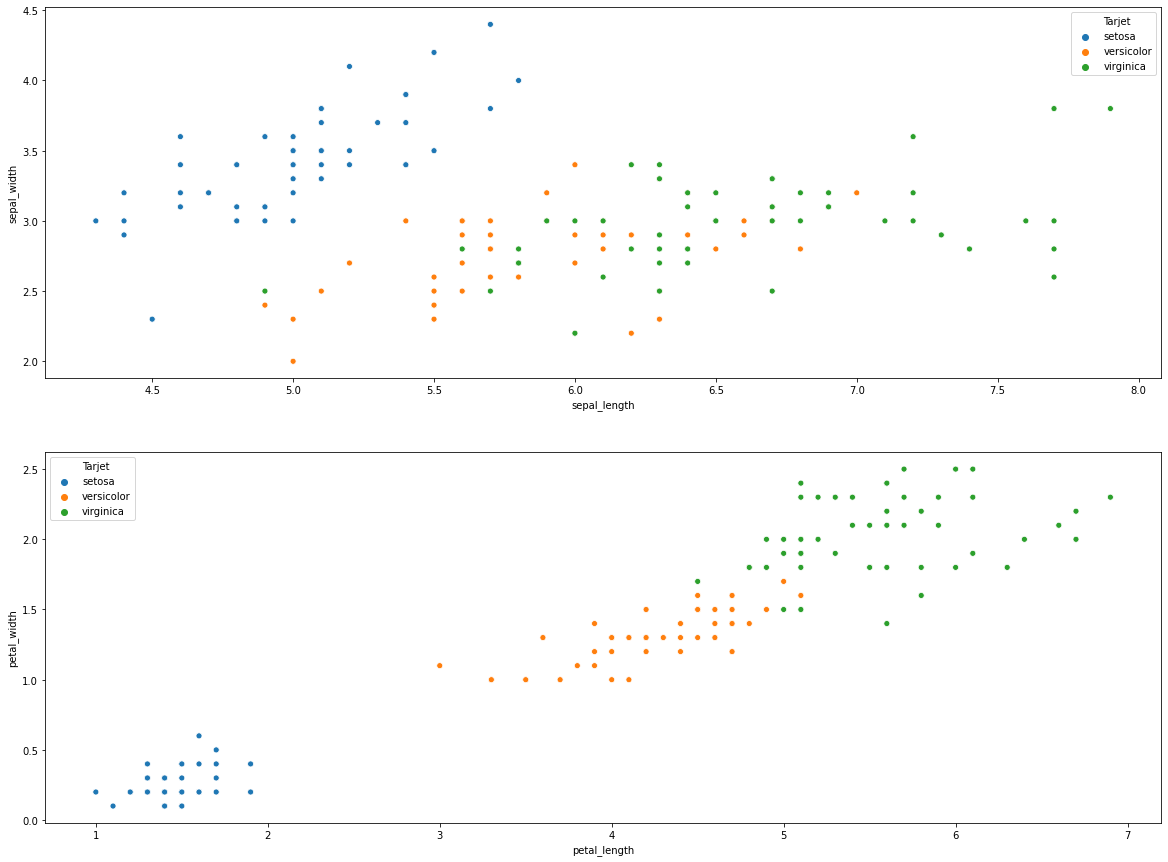

In [11]:
fig,ax = plt.subplots(2,1,figsize =(20,15))
sns.scatterplot(x="sepal_length", y="sepal_width",hue="Tarjet",data=dataNombre,ax = ax[0])
sns.scatterplot(x="petal_length", y="petal_width",hue="Tarjet",data=dataNombre,ax = ax[1])
plt.show()

En el gráfico se puede apreciar lo que hemos apreciado en las estadísticas, Iris Setosa tiene unas características que la diferencian de sus dos hermanas. 

Para este ejemplo además es muy útil, a la hora de visualizar, reducir la dimensionalidad del conjunto de datos. Para eso utilizare PCA. 

In [12]:
from sklearn.decomposition import PCA

Voy a usar scatter de nuevo, así que necesito dos componentes. 

In [13]:
PCA_for_iris = PCA(n_components=2)
PCA_for_iris.fit(data.loc[:, data.columns != 'Tarjet'])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
iris_2_components = PCA_for_iris.transform(data.loc[:, data.columns != 'Tarjet'])
iris_2_components_df = pd.DataFrame(data=iris_2_components, columns = ["x","y"])
iris_2_components_df = pd.concat([iris_2_components_df, dataNombre[['Tarjet']]], axis=1)

En este gráfico se confirma lo que hemos visto anteriormente y también la zona donde vamos a tener mayores dificultades para clasificar. 

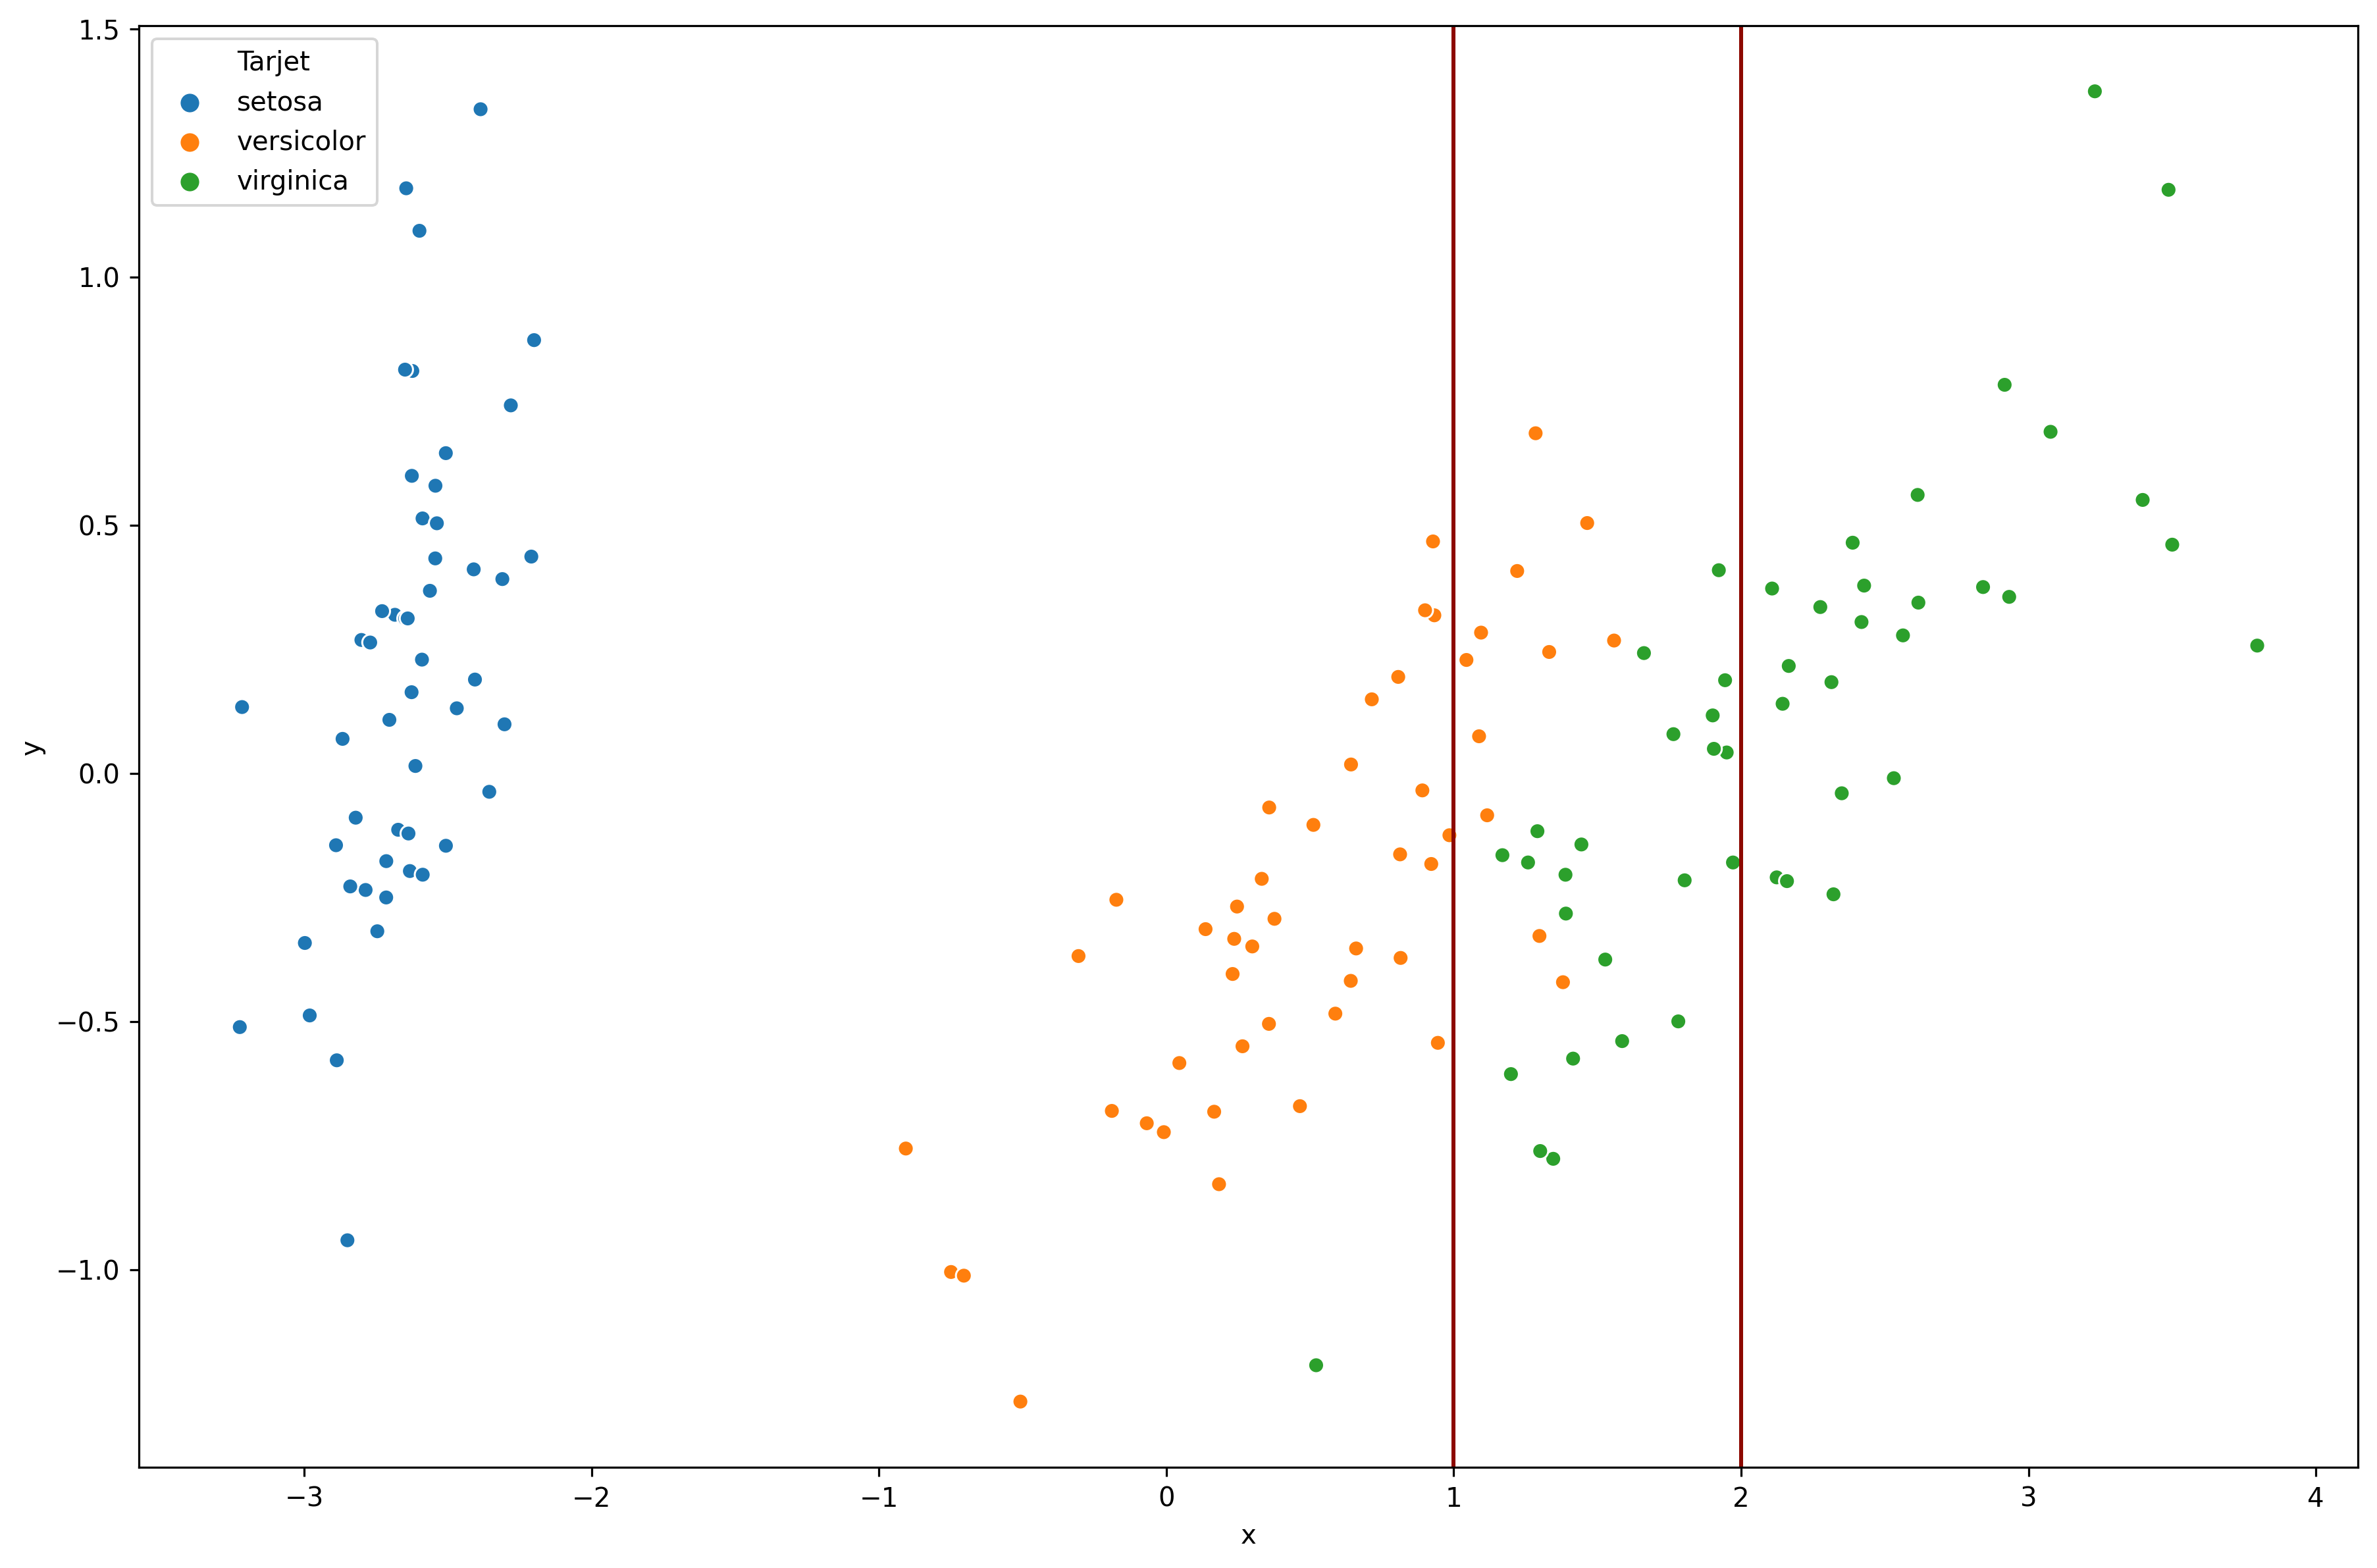

In [15]:
fig = plt.figure(figsize=(15, 10), dpi=290,  facecolor = 'w', edgecolor = 'k')
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x="x", y="y",hue="Tarjet",data=iris_2_components_df, ax= ax) 
ax.axvline(x=1, color='r') 
ax.axvline(x=2, color='r') 

# Clasificadores

Hay multitud de clasificadores, lo más interesante es empezar por lo menos complejo. 

## Tratamiento del conjunto de datos

Para esto solo tengo que separar en conjunto de entrenamiento y conjunto de test. Son muy pocos datos y muy buenos, si fueran más o no fueran datos para un contexto de prueba habría que realizar un preprocesado, por ejemplo, asegurarse de que todo está en arrays numpy o normalizar los datos.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,0:4], iris.target, random_state = 3,test_size=0.1)

In [20]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score

def resultados(y_true,y_pred):
    print("Matriz de confusion:")
    matrix = confusion_matrix(y_true, y_pred)
    print(matrix)
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred, average='macro')
    recall=recall_score(y_true, y_pred, average='macro')
    f1=f1_score(y_true, y_pred, average='macro')
    print('Precisión(Accuracy): {}'.format(accuracy))
    print('Exactitud(Precisión): {}'.format(precision))
    print('Exhaustividad(Recall): {}'.format(recall))
    print('F1: {}'.format(f1))
    return [accuracy,precision,recall,f1]

## Regresión logistica

In [21]:
from sklearn.linear_model import LogisticRegression
logistic_regresor = LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=250).fit(X_train, y_train)
y_train_logistic_regresor = logistic_regresor.predict(X_train)
y_pred_logistic_regresor = logistic_regresor.predict(X_test)
print("---Resultados conjunto de entrenamiento")
resultados(y_train,y_train_logistic_regresor)
print("---Resultados conjunto de test")
resultados(y_test,y_pred_logistic_regresor)

---Resultados conjunto de entrenamiento
Matriz de confusion:
[[43  0  0]
 [ 0 42  3]
 [ 0  1 46]]
Precisión(Accuracy): 0.9703703703703703
Exactitud(Precisión): 0.9718398987501978
Exhaustividad(Recall): 0.9706855791962176
F1: 0.970959595959596
---Resultados conjunto de test
Matriz de confusion:
[[7 0 0]
 [0 5 0]
 [0 0 3]]
Precisión(Accuracy): 1.0
Exactitud(Precisión): 1.0
Exhaustividad(Recall): 1.0
F1: 1.0


[1.0, 1.0, 1.0, 1.0]

## Arból decisión

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_train_dt_classifier = logistic_regresor.predict(X_train)
y_pred_dt_classifier = logistic_regresor.predict(X_test)
print("---Resultados conjunto de entrenamiento")
resultados(y_train,y_train_dt_classifier)
print("---Resultados conjunto de test")
resultados(y_test,y_pred_dt_classifier)

---Resultados conjunto de entrenamiento
Matriz de confusion:
[[43  0  0]
 [ 0 42  3]
 [ 0  1 46]]
Precisión(Accuracy): 0.9703703703703703
Exactitud(Precisión): 0.9718398987501978
Exhaustividad(Recall): 0.9706855791962176
F1: 0.970959595959596
---Resultados conjunto de test
Matriz de confusion:
[[7 0 0]
 [0 5 0]
 [0 0 3]]
Precisión(Accuracy): 1.0
Exactitud(Precisión): 1.0
Exhaustividad(Recall): 1.0
F1: 1.0


[1.0, 1.0, 1.0, 1.0]

## SVM

In [23]:
from sklearn.svm import SVC
svm_classifier = SVC(gamma='auto').fit(X_train, y_train)
y_train_svm = svm_classifier.predict(X_train)
y_pred_svm = svm_classifier.predict(X_test)
print("---Resultados conjunto de entrenamiento")
resultados(y_train,y_train_svm)
print("---Resultados conjunto de test")
resultados(y_test,y_pred_svm)

---Resultados conjunto de entrenamiento
Matriz de confusion:
[[43  0  0]
 [ 0 43  2]
 [ 0  0 47]]
Precisión(Accuracy): 0.9851851851851852
Exactitud(Precisión): 0.9863945578231292
Exhaustividad(Recall): 0.9851851851851853
F1: 0.985479797979798
---Resultados conjunto de test
Matriz de confusion:
[[7 0 0]
 [0 5 0]
 [0 0 3]]
Precisión(Accuracy): 1.0
Exactitud(Precisión): 1.0
Exhaustividad(Recall): 1.0
F1: 1.0


[1.0, 1.0, 1.0, 1.0]

## Clasificador bayesiano ingenuo

In [24]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB().fit(X_train, y_train)
y_train_nb_classifier = nb_classifier.predict(X_train)
y_pred_nb_classifier = nb_classifier.predict(X_test)
print("---Resultados conjunto de entrenamiento")
resultados(y_train,y_train_nb_classifier)
print("---Resultados conjunto de test")
resultados(y_test,y_pred_nb_classifier)

---Resultados conjunto de entrenamiento
Matriz de confusion:
[[43  0  0]
 [ 0 42  3]
 [ 0  4 43]]
Precisión(Accuracy): 0.9481481481481482
Exactitud(Precisión): 0.9492753623188407
Exhaustividad(Recall): 0.9494089834515367
F1: 0.9492693686242074
---Resultados conjunto de test
Matriz de confusion:
[[7 0 0]
 [0 5 0]
 [0 0 3]]
Precisión(Accuracy): 1.0
Exactitud(Precisión): 1.0
Exhaustividad(Recall): 1.0
F1: 1.0


[1.0, 1.0, 1.0, 1.0]

# Cross validation

Lo que se aprecia aquí es que existe un problema con el conjunto de datos y la forma en la que se han probado los algoritmos. Un resultado perfecto hace saltar cualquier alarma. Utilizaré validación cruzada para paliar eso. 

In [25]:
data_shuffle = data.sample(frac=1)
X = data_shuffle.loc[:, data_shuffle.columns != 'Tarjet']
y = data_shuffle[['Tarjet']]

In [26]:
from sklearn.model_selection import cross_val_score

svm_classifier = SVC(gamma='auto')
dt_classifier = DecisionTreeClassifier()
logistic_regresor = LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter=250)
naive_bayes = GaussianNB()

scores_svm_classifier = cross_val_score(svm_classifier, X,y, cv=5, n_jobs=-1)
scores_dt_classifier = cross_val_score(dt_classifier, X,y, cv=5, n_jobs=-1)
scores_logistic_regresor = cross_val_score(logistic_regresor, X,y, cv=5, n_jobs=-1)
scores_naive_bayes = cross_val_score(naive_bayes, X,y, cv=5, n_jobs=-1)

In [27]:
results = pd.DataFrame({'svm': scores_svm_classifier, 
                        'dt': scores_dt_classifier,
                        'logistic_regresor':scores_logistic_regresor,
                        'naive_bayes':scores_naive_bayes})
results

,svm,dt,logistic_regresor,naive_bayes
0,1.000000,0.966667,1.000000,0.966667
1,0.966667,0.900000,0.933333,0.900000
2,1.000000,1.000000,1.000000,1.000000
3,1.000000,0.966667,0.966667,0.966667
4,0.933333,0.933333,0.933333,0.966667


In [28]:
results.sum()

svm                  4.900000
dt                   4.766667
logistic_regresor    4.833333
naive_bayes          4.800000
dtype: float64

Los cuatro algoritmos de clasificación dan resultados muy buenos, el mejor parece la maquina de vector de soporte. En este caso no se han ajustado parámetros de ninguno de los clasificadores. Esto podría hacerse con un grid que para poder ir ajustando los valores. Tampoco se ha analizado que características son las más importantes, para eso es muy interesante el árbol de decisión. 